In [ ]:
!pip install xarray
!pip install ecmwflibs
!pip install cfgrib
!pip install numpy
!pip install pandas

In [ ]:
from typing import List
txt = str("filter_by_keys={'typeOfLevel': 'meanSea'}\n    filter_by_keys={'typeOfLevel': 'hybrid'}\n    filter_by_keys={'typeOfLevel': 'atmosphere'}\n    filter_by_keys={'typeOfLevel': 'surface'}\n    filter_by_keys={'typeOfLevel': 'planetaryBoundaryLayer'}\n    filter_by_keys={'typeOfLevel': 'isobaricInPa'}\n    filter_by_keys={'typeOfLevel': 'isobaricInhPa'}\n    filter_by_keys={'typeOfLevel': 'heightAboveGround'}\n    filter_by_keys={'typeOfLevel': 'depthBelowLandLayer'}\n    filter_by_keys={'typeOfLevel': 'heightAboveSea'}\n    filter_by_keys={'typeOfLevel': 'atmosphereSingleLayer'}\n    filter_by_keys={'typeOfLevel': 'lowCloudLayer'}\n    filter_by_keys={'typeOfLevel': 'middleCloudLayer'}\n    filter_by_keys={'typeOfLevel': 'highCloudLayer'}\n    filter_by_keys={'typeOfLevel': 'cloudCeiling'}\n    filter_by_keys={'typeOfLevel': 'heightAboveGroundLayer'}\n    filter_by_keys={'typeOfLevel': 'tropopause'}\n    filter_by_keys={'typeOfLevel': 'maxWind'}\n    filter_by_keys={'typeOfLevel': 'isothermZero'}\n    filter_by_keys={'typeOfLevel': 'highestTroposphericFreezing'}\n    filter_by_keys={'typeOfLevel': 'pressureFromGroundLayer'}\n    filter_by_keys={'typeOfLevel': 'sigmaLayer'}\n    filter_by_keys={'typeOfLevel': 'sigma'}\n    filter_by_keys={'typeOfLevel': 'potentialVorticity'}")

def cls_txt(det: str):

    

    det = det.lower()
    det = det.replace("=", "")
    det = det.replace("{", "")
    det = det.replace("}", "")
    det = det.replace("\n", "")
    det = det.replace(":", "")
    det = det.replace("'", "")
    det = det.replace("  ", " ")
    det = det.replace("filter_by_keys", "")
    det = det.replace("typeoflevel", "")
    det = det.replace("  ", "")
    det = det.lstrip()
    det = det.rstrip()
    det = det
    
    det = det.replace(" ", ", ")
    return det

txt2 = cls_txt(txt)

perams = []
txt3 = txt2.split(',')  # Split txt2 outside the loop
for n in range(len(txt3)):
    txt3[n] = txt3[n].lstrip()  # Corrected: Assign back the stripped string
    perams.append(txt3[n])  # Corrected: Append the stripped string to perams

perams.remove('hybrid')
perams

In [ ]:
### GFS DATA CURATION AND PREPROCESSING ###
data_path = r"C:\Projs\COde\Earthquake\earthquake-prediction\data\GFS" # Change DATA PATH


def wrf_prep_fn(pats, key_params):
    """
    
    """
    for root, dirs, files in os.walk(pats):
        for f in files:
            try:
                if f.endswith('.grb2'):
                    for key_param in perams:
                        try:
                            f_pt = os.path.join(root, f)
                            ini_ds = open_dataset(f_pt, engine='cfgrib', backend_kwargs={'filter_by_keys': {'typeOfLevel': 'surface'}}, decode_cf=True)
                            var_nams = list(loc_data(ini_ds, 22.71, 77.41).data_vars)

                            init_df = pd.DataFrame()
                            vals = []

                            for var_name in var_nams:  # Loop through variable names
                                
                                data_value = loc_data(ini_ds, 22.71, 77.41)[var_name].values
                                print(f"{var_name}: {data_value}")
                                init_df[var_name] = ''  # Use variable name as column name

                                vals.append(data_value)

                            init_df.loc[len(init_df)] = vals
                            ini_ds.close()
                            return init_df
                        except Exception as e:
                            print(f"{e}: Error opening the dataset file, probably hte required file format is not present.")
            except FileNotFoundError as e:
                print(f"{e}: Gridded Dataset File Not found, consider checking he directory.")

            # return data_value
            

dpfs = wrf_prep_fn(data_path, txt2)

---

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('data/bhopal_weather_forecast.csv')
df

,Date,Temperature (°C),Humidity (%),Precipitation (mm),Wind Speed (m/s),Wind Direction,Thunderstorm Likelihood
0,2024-04-29,33.1,29,0.0000,1.8,west,No
1,2024-04-30,32.7,27,0.0000,1.9,west-northwest,No
2,2024-05-01,30.9,21,0.0000,2.3,west-northwest,No
3,2024-05-02,29.7,18,0.0000,1.6,west,No
4,2024-05-03,30.9,21,0.0000,1.1,west-northwest,No
5,2024-05-04,32.1,18,0.0000,1.6,west,No
6,2024-05-05,36.4,20,0.0000,5.6,west-northwest,No
7,2024-05-06,36.1,19,0.0000,5.3,west-northwest,No
8,2024-05-07,36.0,23,0.4375,5.9,west-northwest,No
9,2024-05-08,35.8,22,0.0000,3.3,west-northwest,No


In [19]:
def create_heatmap(dates, temperatures):
  """
  Creates a daily temperature heatmap for the provided data.

  Args:
      dates (pandas.Series): Datetime series representing dates.
      temperatures (pandas.Series): Numeric series representing temperatures.
  """

  # Group data by day and calculate average temperature
  daily_temps = dates.groupby(dates.dt.date).mean()['Temperature (°C)']

  # Create a time series for the heatmap (assuming daily data)
  days = pd.date_range(min(dates), max(dates)).tolist()

  # Create a 2D list representing the heatmap data (one list per day)
  heatmap_data = []
  for day in days:
    if day in daily_temps.index:
      heatmap_data.append([day.day, day.month, daily_temps.loc[day]])
    else:
      heatmap_data.append([day.day, day.month, None])  # Fill missing values with None

  # Configure the heatmap plot
  fig, ax = plt.subplots()
  ax.pcolormesh(
      [d[0] for d in heatmap_data],  # Days
      [d[1] for d in heatmap_data],  # Months
      [d[2] if d[2] is not None else 0 for d in heatmap_data],  # Temperatures (handle missing values)
      cmap='plasma'  # Adjust colormap as desired
  )

  # Set labels and title
  ax.set_xlabel('Day of Month')
  ax.set_ylabel('Month')
  fig.colorbar(label='Temperature (°C)')  # Adjust units if needed
  plt.title('Temperature Heatmap for Specific Location')

  # Optional: Rotate x-axis labels for better readability
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()


In [20]:
temperatures = df['Temperature (°C)']
dates = pd.to_datetime(df['Date'])

In [ ]:
create_heatmap(dates, temperatures)

In [ ]:
import pandas as pd
import plotly.graph_objs as go

# Load the data into a DataFrame
df = pd.read_csv('data/bhopal_weather_forecast.csv')

# Convert the Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Assuming you have the latitude and longitude for the location
# Replace with the actual coordinates
latitude = 23.2599
longitude = 77.4126

# Create a data frame with date, latitude, longitude, and temperature
data = pd.DataFrame({
    'date': df['Date'],
    'lat': latitude,
    'lon': longitude,
    'temperature': df['Temperature (°C)']
})

# Create the heatmap trace
heatmap_trace = go.Densitymapbox(
    lat=data['lat'],
    lon=data['lon'],
    z=data['temperature'],
    radius=100,
    colorscale='Viridis'
)

# Create the map layout
map_layout = go.Layout(
    mapbox_style='open-street-map',
    mapbox_center_lon=longitude,
    mapbox_center_lat=latitude,
    mapbox_zoom=10,
    margin=dict(r=0, l=0, b=0, t=0)
)

# Create the Plotly figure
fig = go.Figure(data=heatmap_trace, layout=map_layout)

# Plot the figure
fig.show()

In [29]:
df

,Date,Temperature (°C),Humidity (%),Precipitation (mm),Wind Speed (m/s),Wind Direction,Thunderstorm Likelihood,Longitude,Latitude
0,2024-04-29,33.1,29,0.0000,1.8,west,No,23.2599,77.4126
1,2024-04-30,32.7,27,0.0000,1.9,west-northwest,No,23.2599,77.4126
2,2024-05-01,30.9,21,0.0000,2.3,west-northwest,No,23.2599,77.4126
3,2024-05-02,29.7,18,0.0000,1.6,west,No,23.2599,77.4126
4,2024-05-03,30.9,21,0.0000,1.1,west-northwest,No,23.2599,77.4126
5,2024-05-04,32.1,18,0.0000,1.6,west,No,23.2599,77.4126
6,2024-05-05,36.4,20,0.0000,5.6,west-northwest,No,23.2599,77.4126
7,2024-05-06,36.1,19,0.0000,5.3,west-northwest,No,23.2599,77.4126
8,2024-05-07,36.0,23,0.4375,5.9,west-northwest,No,23.2599,77.4126
9,2024-05-08,35.8,22,0.0000,3.3,west-northwest,No,23.2599,77.4126


In [31]:
df.Latitude

0     77.4126
1     77.4126
2     77.4126
3     77.4126
4     77.4126
5     77.4126
6     77.4126
7     77.4126
8     77.4126
9     77.4126
10    77.4126
11    77.4126
12    77.4126
13    77.4126
14    77.4126
15    77.4126
Name: Latitude, dtype: float64

In [34]:
import pandas as pd
import plotly.graph_objs as go
import numpy as np  # Import NumPy for noise generation

# Load the data into a DataFrame
# df = pd.read_csv('data/bhopal_weather_forecast.csv')

# Convert the Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Assuming you have the latitude and longitude for the location
# Replace with the actual coordinates
# latitude = 23.2599
# longitude = 77.4126

# Create a data frame with date, latitude, longitude, and temperature
data = pd.DataFrame({
  'date': df['Date'],
  'lat': df['Latitude'],
  'lon': df['Longitude'],
  'temperature': df['Temperature (°C)']
})

# Add non-linear noise to temperature (adjust noise_amplitude for effect)
noise_amplitude = 15  # Adjust this value to control noise intensity
noise = np.random.rand(len(data)) * noise_amplitude - noise_amplitude / 2  # Centered noise
data['temperature'] += noise

# Create the heatmap trace (similar to previous code)
heatmap_trace = go.Densitymapbox(
  lat=data['lat'],
  lon=data['lon'],
  z=data['temperature'],
  radius=50,
  colorscale='Viridis'
)

# Create the contour trace
contour_trace = go.Contour(
  x=data['lon'].unique(),  # Use unique longitude values for grid
  y=data['lat'].unique(),  # Use unique latitude values for grid
  z=data['temperature'].values.reshape(len(data['lat'].unique()), -1),  # Reshape for contour grid
  showscale=False,  # Hide colorbar for contours (optional)
  line_smoothing=0.9,  # Adjust smoothing for a smoother look (optional)
  colorscale='Bluered'  # Color scale for contours (optional)
)

# Create the map layout (similar to previous code)
map_layout = go.Layout(
  mapbox_style='open-street-map',
  mapbox_center_lon=longitude,
  mapbox_center_lat=latitude,
  mapbox_zoom=15,
  margin=dict(r=0, l=0, t=0, b=0)
)

# Combine traces and display the figure
fig = go.Figure(data=[heatmap_trace, contour_trace], layout=map_layout)
fig.show()


In [32]:
df['Longitude'] = 77.4126
df['Latitude'] = 23.2599

In [33]:

df

,Date,Temperature (°C),Humidity (%),Precipitation (mm),Wind Speed (m/s),Wind Direction,Thunderstorm Likelihood,Longitude,Latitude
0,2024-04-29,33.1,29,0.0000,1.8,west,No,77.4126,23.2599
1,2024-04-30,32.7,27,0.0000,1.9,west-northwest,No,77.4126,23.2599
2,2024-05-01,30.9,21,0.0000,2.3,west-northwest,No,77.4126,23.2599
3,2024-05-02,29.7,18,0.0000,1.6,west,No,77.4126,23.2599
4,2024-05-03,30.9,21,0.0000,1.1,west-northwest,No,77.4126,23.2599
5,2024-05-04,32.1,18,0.0000,1.6,west,No,77.4126,23.2599
6,2024-05-05,36.4,20,0.0000,5.6,west-northwest,No,77.4126,23.2599
7,2024-05-06,36.1,19,0.0000,5.3,west-northwest,No,77.4126,23.2599
8,2024-05-07,36.0,23,0.4375,5.9,west-northwest,No,77.4126,23.2599
9,2024-05-08,35.8,22,0.0000,3.3,west-northwest,No,77.4126,23.2599


In [54]:
# Load data from CSV
weather_data = pd.read_csv(r"C:\Projs\COde\Meteo\MetP\data\bhopal_weather_hourly_10_days.csv")
weather_data['Longitude'] = 77.4126
weather_data['Latitude'] = 23.2599
weather_data['Datetime'] = pd.to_datetime(weather_data['Datetime'])
weather_data

,Datetime,Temperature (°C),Relative Humidity (%),Precipitation (mm),Wind Speed (m/s),Wind Direction (degrees),Cloud Coverage (%),Thunderstorm Occurrence,Longitude,Latitude
0,2024-04-29 16:00:00,39.8,15,0.0,4.13,253,0,No,77.4126,23.2599
1,2024-04-29 17:00:00,38.8,15,0.0,3.58,253,0,No,77.4126,23.2599
2,2024-04-29 18:00:00,37.5,16,0.0,2.27,248,0,No,77.4126,23.2599
3,2024-04-29 19:00:00,35.2,20,0.0,1.29,256,60,No,77.4126,23.2599
4,2024-04-29 20:00:00,33.6,23,0.0,1.26,275,50,No,77.4126,23.2599
...,...,...,...,...,...,...,...,...,...,...
235,2024-05-09 11:00:00,35.6,24,0.0,4.48,291,16,No,77.4126,23.2599
236,2024-05-09 12:00:00,36.4,23,0.0,4.08,291,14,No,77.4126,23.2599
237,2024-05-09 13:00:00,37.2,21,0.0,3.68,291,12,No,77.4126,23.2599
238,2024-05-09 14:00:00,38.0,20,0.0,3.27,291,10,No,77.4126,23.2599


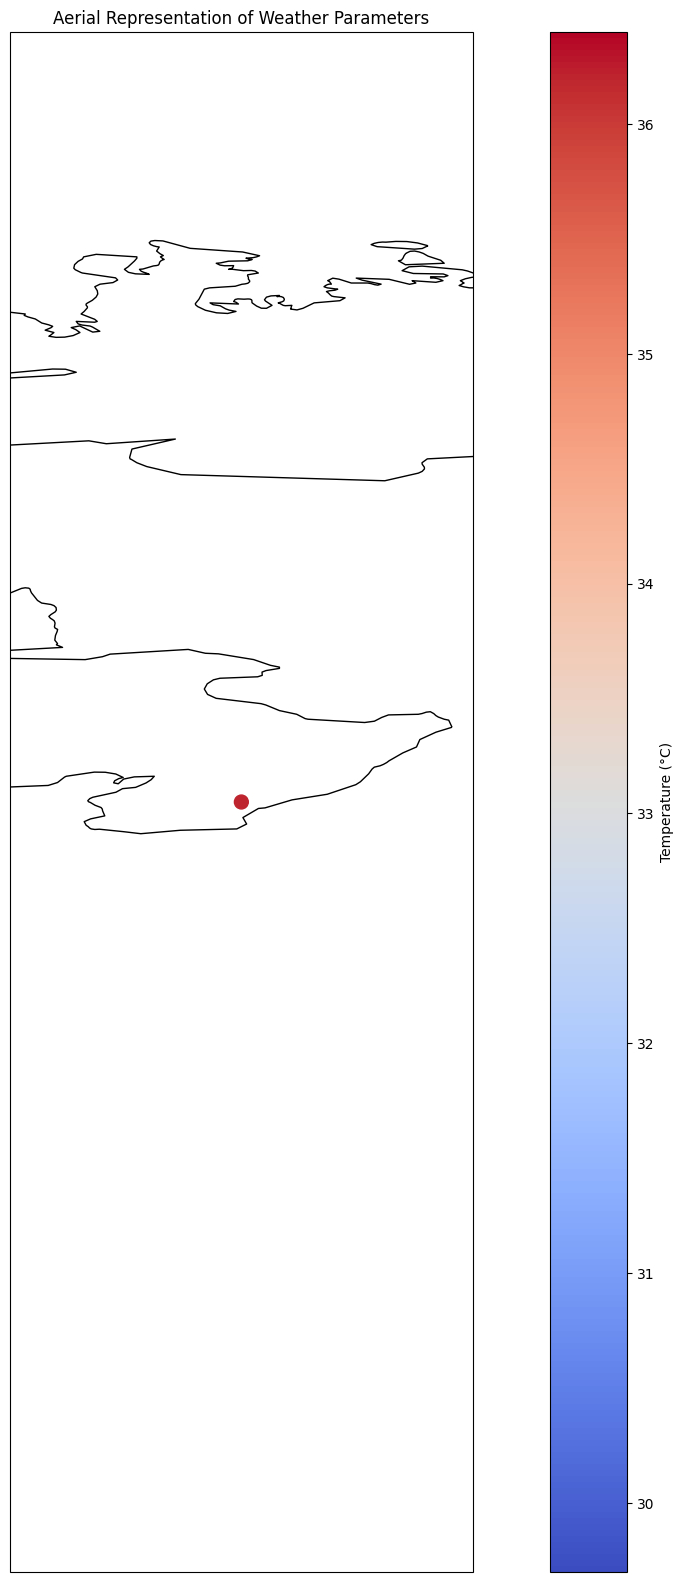

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Load the dataset from the CSV file
# df = pd.read_csv('your_dataset.csv')

# Extract necessary columns
lon = df['Longitude']
lat = df['Latitude']
temperature = df['Temperature (°C)']
precipitation = (df['Precipitation (mm)'] - df['Precipitation (mm)'].min()) / (df['Precipitation (mm)'].max() - df['Precipitation (mm)'].min())

# Create a map projection
projection = ccrs.PlateCarree()

# Plot weather data on a map
plt.figure(figsize=(20,20))
ax = plt.axes(projection=projection)
ax.set_title('Aerial Representation of Weather Parameters')

# Scatter plot with weather parameters mapped to visual attributes
sc = ax.scatter(lon, lat, c=temperature, s=precipitation*100, cmap='coolwarm', transform=projection)
plt.colorbar(sc, label='Temperature (°C)')
ax.coastlines()

plt.show()


In [44]:
import pandas as pd
import plotly.graph_objs as go
import numpy as np

# Load the data into a DataFrame (replace with your data loading logic)
# df = pd.read_csv('data/bhopal_weather_forecast.csv')

# Assuming you have the latitude and longitude for the location
# Replace with the actual coordinates
latitude = 23.2599
longitude = 77.4126

# Create a data frame with date, latitude, longitude, and temperature
data = pd.DataFrame({
  'date': df['Date'],  # Replace with the actual column name for date
  'lat': df['Latitude'],  # Replace with the actual column name for latitude
  'lon': df['Longitude'],  # Replace with the actual column name for longitude
  'temperature': df['Temperature (°C)']  # Replace with the actual column name for temperature
})

# Add non-linear noise to temperature (adjust noise_amplitude for effect)
noise_amplitude = 15  # Adjust this value to control noise intensity
noise = np.random.rand(len(data)) * noise_amplitude - noise_amplitude / 2  # Centered noise
data['temperature'] += noise

# Define grid parameters (adjust as needed)
grid_size = 50
lon_min, lon_max = data['lon'].min(), data['lon'].max()
lat_min, lat_max = data['lat'].min(), data['lat'].max()
lons, lats = np.linspace(lon_min, lon_max, grid_size), np.linspace(lat_min, lat_max, grid_size)



def estimate_density_idw(data, power=2):
  """
  Estimates density using Inverse Distance Weighting (IDW).

  Args:
      data (pd.DataFrame): DataFrame containing latitude, longitude, and temperature data.
      power (int, optional): Power parameter for IDW weighting. Defaults to 2.

  Returns:
      np.ndarray: A 2D array containing the estimated density at each grid point.
  """

  # Create an empty density grid
  density_grid = np.zeros((grid_size, grid_size))

  # Iterate through each grid point
  for i in range(grid_size):
    for j in range(grid_size):
      lon, lat = lons[j], lats[i]

      # Calculate distances to data points
      distances = np.sqrt(((data['lon'] - lon) ** 2) + ((data['lat'] - lat) ** 2))

      # Apply IDW weighting
      weights = 1 / (distances**power)

      # Normalize weights (optional)
      weights /= weights.sum()

      # Calculate weighted average temperature
      density_grid[i, j] = np.average(data['temperature'], weights=weights)

  return density_grid
# print(lons)
# Create the heatmap trace using IDW estimated density
heatmap_trace = go.Heatmap(
  x=lons,
  y=lats,
  z=estimate_density_idw(data),
  colorscale='Viridis'
)

# Create the map layout
map_layout = go.Layout(
  mapbox_style='open-street-map',
  mapbox_center_lon=longitude,
  mapbox_center_lat=latitude,
  mapbox_zoom=1,
  margin=dict(r=0, l=0, t=0, b=0)
)

# Combine traces and display the figure
fig = go.Figure(data=[heatmap_trace], layout=map_layout)
fig.show()


In [56]:
import pandas as pd
import plotly.graph_objs as go
import numpy as np

# Load your weather data
df = pd.read_csv(r"C:\Projs\COde\Meteo\MetP\data\bhopal_weather_hourly_10_days.csv")
df['Longitude'] = 77.4126
df['Latitude'] = 23.2599
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Create a data frame with date, latitude, longitude, and temperature
data = pd.DataFrame({
  'date': df['Datetime'],  # Replace with the actual column name for date
  'lat': df['Latitude'],  # Replace with the actual column name for latitude
  'lon': df['Longitude'],  # Replace with the actual column name for longitude
  'temperature': df['Temperature (°C)']  # Replace with the actual column name for temperature
})

# (Optional) Add non-linear noise to data (adjust for effect)
noise_amplitude = 15
noise = np.random.rand(len(data)) * noise_amplitude - noise_amplitude / 2
data['temperature'] += noise


def estimate_density_idw(data, power=2):
  """
  Estimates density using Inverse Distance Weighting (IDW).

  Args:
      data (pd.DataFrame): DataFrame containing latitude, longitude, and temperature data.
      power (int, optional): Power parameter for IDW weighting. Defaults to 2.

  Returns:
      np.ndarray: A 2D array containing the estimated density at each grid point.
  """
  # Define grid parameters (adjust as needed)
  grid_size = 50
  lon_min, lon_max = data['lon'].min(), data['lon'].max()
  lat_min, lat_max = data['lat'].min(), data['lat'].max()
  lons, lats = np.linspace(lon_min, lon_max, grid_size), np.linspace(lat_min, lat_max, grid_size)

  # Create an empty density grid
  density_grid = np.zeros((grid_size, grid_size))

  # Iterate through each grid point
  for i in range(grid_size):
    for j in range(grid_size):
      lon, lat = lons[j], lats[i]

      # Calculate distances to data points
      distances = np.sqrt(((data['lon'] - lon) ** 2) + ((data['lat'] - lat) ** 2))

      # Apply IDW weighting
      weights = 1 / (distances**power)

      # Normalize weights (optional)
      weights /= weights.sum()

      # Calculate weighted average temperature
      density_grid[i, j] = np.average(data['temperature'], weights=weights)

  return density_grid

# Create the density grid using IDW
density_grid = estimate_density_idw(data)

# Create the heatmap trace (replace with your preferred visual style)
heatmap_trace = go.Heatmap(
  x=lons,
  y=lats,
  z=density_grid,
  colorscale='Viridis',  # Adjust colorscale for preference
  showscale=False  # Hide colorscale for heatmap (optional)
)

# Create contours from the data (replace with your desired contour levels)
contour_levels = [0.2, 0.4, 0.6, 0.8]  # Adjust contour levels as needed
contours_trace = go.Contour(
  x=lons,
  y=lats,
  z=density_grid,
  showscale=False,  # Hide colorscale for contours (optional)
  line_smoothing=0.9,  # Adjust smoothing for a smoother look (optional)
  # levels=contour_levels,
  fill_color='none',  # Remove fill color for line contours
  line_color='darkblue'  # Adjust line color for preference
)

# Create the map layout
map_layout = go.Layout(
  mapbox_style='open-street-map',
  mapbox_center_lon=data['lon'].mean(),  # Adjust center as needed
  mapbox_center_lat=data['lat'].mean(),  # Adjust center as needed
  mapbox_zoom=5  # Adjust zoom level for desired coverage
)

# Combine traces and display the figure
fig = go.Figure(data=[heatmap_trace, contours_trace], layout=map_layout)
fig.show()


ValueError: Invalid property specified for object of type plotly.graph_objs.Contour: 'levels'

Did you mean "legend"?

    Valid properties:
        autocolorscale
            Determines whether the colorscale is a default palette
            (`autocolorscale: true`) or the palette determined by
            `colorscale`. In case `colorscale` is unspecified or
            `autocolorscale` is true, the default palette will be
            chosen according to whether numbers in the `color`
            array are all positive, all negative or mixed.
        autocontour
            Determines whether or not the contour level attributes
            are picked by an algorithm. If True, the number of
            contour levels can be set in `ncontours`. If False, set
            the contour level attributes in `contours`.
        coloraxis
            Sets a reference to a shared color axis. References to
            these shared color axes are "coloraxis", "coloraxis2",
            "coloraxis3", etc. Settings for these shared color axes
            are set in the layout, under `layout.coloraxis`,
            `layout.coloraxis2`, etc. Note that multiple color
            scales can be linked to the same color axis.
        colorbar
            :class:`plotly.graph_objects.contour.ColorBar` instance
            or dict with compatible properties
        colorscale
            Sets the colorscale. The colorscale must be an array
            containing arrays mapping a normalized value to an rgb,
            rgba, hex, hsl, hsv, or named color string. At minimum,
            a mapping for the lowest (0) and highest (1) values are
            required. For example, `[[0, 'rgb(0,0,255)'], [1,
            'rgb(255,0,0)']]`. To control the bounds of the
            colorscale in color space, use `zmin` and `zmax`.
            Alternatively, `colorscale` may be a palette name
            string of the following list: Blackbody,Bluered,Blues,C
            ividis,Earth,Electric,Greens,Greys,Hot,Jet,Picnic,Portl
            and,Rainbow,RdBu,Reds,Viridis,YlGnBu,YlOrRd.
        connectgaps
            Determines whether or not gaps (i.e. {nan} or missing
            values) in the `z` data are filled in. It is defaulted
            to true if `z` is a one dimensional array otherwise it
            is defaulted to false.
        contours
            :class:`plotly.graph_objects.contour.Contours` instance
            or dict with compatible properties
        customdata
            Assigns extra data each datum. This may be useful when
            listening to hover, click and selection events. Note
            that, "scatter" traces also appends customdata items in
            the markers DOM elements
        customdatasrc
            Sets the source reference on Chart Studio Cloud for
            `customdata`.
        dx
            Sets the x coordinate step. See `x0` for more info.
        dy
            Sets the y coordinate step. See `y0` for more info.
        fillcolor
            Sets the fill color if `contours.type` is "constraint".
            Defaults to a half-transparent variant of the line
            color, marker color, or marker line color, whichever is
            available.
        hoverinfo
            Determines which trace information appear on hover. If
            `none` or `skip` are set, no information is displayed
            upon hovering. But, if `none` is set, click and hover
            events are still fired.
        hoverinfosrc
            Sets the source reference on Chart Studio Cloud for
            `hoverinfo`.
        hoverlabel
            :class:`plotly.graph_objects.contour.Hoverlabel`
            instance or dict with compatible properties
        hoverongaps
            Determines whether or not gaps (i.e. {nan} or missing
            values) in the `z` data have hover labels associated
            with them.
        hovertemplate
            Template string used for rendering the information that
            appear on hover box. Note that this will override
            `hoverinfo`. Variables are inserted using %{variable},
            for example "y: %{y}" as well as %{xother}, {%_xother},
            {%_xother_}, {%xother_}. When showing info for several
            points, "xother" will be added to those with different
            x positions from the first point. An underscore before
            or after "(x|y)other" will add a space on that side,
            only when this field is shown. Numbers are formatted
            using d3-format's syntax %{variable:d3-format}, for
            example "Price: %{y:$.2f}".
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format
            for details on the formatting syntax. Dates are
            formatted using d3-time-format's syntax
            %{variable|d3-time-format}, for example "Day:
            %{2019-01-01|%A}". https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format for details on the
            date formatting syntax. The variables available in
            `hovertemplate` are the ones emitted as event data
            described at this link
            https://plotly.com/javascript/plotlyjs-events/#event-
            data. Additionally, every attributes that can be
            specified per-point (the ones that are `arrayOk: true`)
            are available.  Anything contained in tag `<extra>` is
            displayed in the secondary box, for example
            "<extra>{fullData.name}</extra>". To hide the secondary
            box completely, use an empty tag `<extra></extra>`.
        hovertemplatesrc
            Sets the source reference on Chart Studio Cloud for
            `hovertemplate`.
        hovertext
            Same as `text`.
        hovertextsrc
            Sets the source reference on Chart Studio Cloud for
            `hovertext`.
        ids
            Assigns id labels to each datum. These ids for object
            constancy of data points during animation. Should be an
            array of strings, not numbers or any other type.
        idssrc
            Sets the source reference on Chart Studio Cloud for
            `ids`.
        legend
            Sets the reference to a legend to show this trace in.
            References to these legends are "legend", "legend2",
            "legend3", etc. Settings for these legends are set in
            the layout, under `layout.legend`, `layout.legend2`,
            etc.
        legendgroup
            Sets the legend group for this trace. Traces and shapes
            part of the same legend group hide/show at the same
            time when toggling legend items.
        legendgrouptitle
            :class:`plotly.graph_objects.contour.Legendgrouptitle`
            instance or dict with compatible properties
        legendrank
            Sets the legend rank for this trace. Items and groups
            with smaller ranks are presented on top/left side while
            with "reversed" `legend.traceorder` they are on
            bottom/right side. The default legendrank is 1000, so
            that you can use ranks less than 1000 to place certain
            items before all unranked items, and ranks greater than
            1000 to go after all unranked items. When having
            unranked or equal rank items shapes would be displayed
            after traces i.e. according to their order in data and
            layout.
        legendwidth
            Sets the width (in px or fraction) of the legend for
            this trace.
        line
            :class:`plotly.graph_objects.contour.Line` instance or
            dict with compatible properties
        meta
            Assigns extra meta information associated with this
            trace that can be used in various text attributes.
            Attributes such as trace `name`, graph, axis and
            colorbar `title.text`, annotation `text`
            `rangeselector`, `updatemenues` and `sliders` `label`
            text all support `meta`. To access the trace `meta`
            values in an attribute in the same trace, simply use
            `%{meta[i]}` where `i` is the index or key of the
            `meta` item in question. To access trace `meta` in
            layout attributes, use `%{data[n[.meta[i]}` where `i`
            is the index or key of the `meta` and `n` is the trace
            index.
        metasrc
            Sets the source reference on Chart Studio Cloud for
            `meta`.
        name
            Sets the trace name. The trace name appears as the
            legend item and on hover.
        ncontours
            Sets the maximum number of contour levels. The actual
            number of contours will be chosen automatically to be
            less than or equal to the value of `ncontours`. Has an
            effect only if `autocontour` is True or if
            `contours.size` is missing.
        opacity
            Sets the opacity of the trace.
        reversescale
            Reverses the color mapping if true. If true, `zmin`
            will correspond to the last color in the array and
            `zmax` will correspond to the first color.
        showlegend
            Determines whether or not an item corresponding to this
            trace is shown in the legend.
        showscale
            Determines whether or not a colorbar is displayed for
            this trace.
        stream
            :class:`plotly.graph_objects.contour.Stream` instance
            or dict with compatible properties
        text
            Sets the text elements associated with each z value.
        textfont
            For this trace it only has an effect if `coloring` is
            set to "heatmap". Sets the text font.
        textsrc
            Sets the source reference on Chart Studio Cloud for
            `text`.
        texttemplate
            For this trace it only has an effect if `coloring` is
            set to "heatmap". Template string used for rendering
            the information text that appear on points. Note that
            this will override `textinfo`. Variables are inserted
            using %{variable}, for example "y: %{y}". Numbers are
            formatted using d3-format's syntax
            %{variable:d3-format}, for example "Price: %{y:$.2f}".
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format
            for details on the formatting syntax. Dates are
            formatted using d3-time-format's syntax
            %{variable|d3-time-format}, for example "Day:
            %{2019-01-01|%A}". https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format for details on the
            date formatting syntax. Every attributes that can be
            specified per-point (the ones that are `arrayOk: true`)
            are available. Finally, the template string has access
            to variables `x`, `y`, `z` and `text`.
        transpose
            Transposes the z data.
        uid
            Assign an id to this trace, Use this to provide object
            constancy between traces during animations and
            transitions.
        uirevision
            Controls persistence of some user-driven changes to the
            trace: `constraintrange` in `parcoords` traces, as well
            as some `editable: true` modifications such as `name`
            and `colorbar.title`. Defaults to `layout.uirevision`.
            Note that other user-driven trace attribute changes are
            controlled by `layout` attributes: `trace.visible` is
            controlled by `layout.legend.uirevision`,
            `selectedpoints` is controlled by
            `layout.selectionrevision`, and `colorbar.(x|y)`
            (accessible with `config: {editable: true}`) is
            controlled by `layout.editrevision`. Trace changes are
            tracked by `uid`, which only falls back on trace index
            if no `uid` is provided. So if your app can add/remove
            traces before the end of the `data` array, such that
            the same trace has a different index, you can still
            preserve user-driven changes if you give each trace a
            `uid` that stays with it as it moves.
        visible
            Determines whether or not this trace is visible. If
            "legendonly", the trace is not drawn, but can appear as
            a legend item (provided that the legend itself is
            visible).
        x
            Sets the x coordinates.
        x0
            Alternate to `x`. Builds a linear space of x
            coordinates. Use with `dx` where `x0` is the starting
            coordinate and `dx` the step.
        xaxis
            Sets a reference between this trace's x coordinates and
            a 2D cartesian x axis. If "x" (the default value), the
            x coordinates refer to `layout.xaxis`. If "x2", the x
            coordinates refer to `layout.xaxis2`, and so on.
        xcalendar
            Sets the calendar system to use with `x` date data.
        xhoverformat
            Sets the hover text formatting rulefor `x`  using d3
            formatting mini-languages which are very similar to
            those in Python. For numbers, see:
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format.
            And for dates see: https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format. We add two items to
            d3's date formatter: "%h" for half of the year as a
            decimal number as well as "%{n}f" for fractional
            seconds with n digits. For example, *2016-10-13
            09:15:23.456* with tickformat "%H~%M~%S.%2f" would
            display *09~15~23.46*By default the values are
            formatted using `xaxis.hoverformat`.
        xperiod
            Only relevant when the axis `type` is "date". Sets the
            period positioning in milliseconds or "M<n>" on the x
            axis. Special values in the form of "M<n>" could be
            used to declare the number of months. In this case `n`
            must be a positive integer.
        xperiod0
            Only relevant when the axis `type` is "date". Sets the
            base for period positioning in milliseconds or date
            string on the x0 axis. When `x0period` is round number
            of weeks, the `x0period0` by default would be on a
            Sunday i.e. 2000-01-02, otherwise it would be at
            2000-01-01.
        xperiodalignment
            Only relevant when the axis `type` is "date". Sets the
            alignment of data points on the x axis.
        xsrc
            Sets the source reference on Chart Studio Cloud for
            `x`.
        xtype
            If "array", the heatmap's x coordinates are given by
            "x" (the default behavior when `x` is provided). If
            "scaled", the heatmap's x coordinates are given by "x0"
            and "dx" (the default behavior when `x` is not
            provided).
        y
            Sets the y coordinates.
        y0
            Alternate to `y`. Builds a linear space of y
            coordinates. Use with `dy` where `y0` is the starting
            coordinate and `dy` the step.
        yaxis
            Sets a reference between this trace's y coordinates and
            a 2D cartesian y axis. If "y" (the default value), the
            y coordinates refer to `layout.yaxis`. If "y2", the y
            coordinates refer to `layout.yaxis2`, and so on.
        ycalendar
            Sets the calendar system to use with `y` date data.
        yhoverformat
            Sets the hover text formatting rulefor `y`  using d3
            formatting mini-languages which are very similar to
            those in Python. For numbers, see:
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format.
            And for dates see: https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format. We add two items to
            d3's date formatter: "%h" for half of the year as a
            decimal number as well as "%{n}f" for fractional
            seconds with n digits. For example, *2016-10-13
            09:15:23.456* with tickformat "%H~%M~%S.%2f" would
            display *09~15~23.46*By default the values are
            formatted using `yaxis.hoverformat`.
        yperiod
            Only relevant when the axis `type` is "date". Sets the
            period positioning in milliseconds or "M<n>" on the y
            axis. Special values in the form of "M<n>" could be
            used to declare the number of months. In this case `n`
            must be a positive integer.
        yperiod0
            Only relevant when the axis `type` is "date". Sets the
            base for period positioning in milliseconds or date
            string on the y0 axis. When `y0period` is round number
            of weeks, the `y0period0` by default would be on a
            Sunday i.e. 2000-01-02, otherwise it would be at
            2000-01-01.
        yperiodalignment
            Only relevant when the axis `type` is "date". Sets the
            alignment of data points on the y axis.
        ysrc
            Sets the source reference on Chart Studio Cloud for
            `y`.
        ytype
            If "array", the heatmap's y coordinates are given by
            "y" (the default behavior when `y` is provided) If
            "scaled", the heatmap's y coordinates are given by "y0"
            and "dy" (the default behavior when `y` is not
            provided)
        z
            Sets the z data.
        zauto
            Determines whether or not the color domain is computed
            with respect to the input data (here in `z`) or the
            bounds set in `zmin` and `zmax` Defaults to `false`
            when `zmin` and `zmax` are set by the user.
        zhoverformat
            Sets the hover text formatting rulefor `z`  using d3
            formatting mini-languages which are very similar to
            those in Python. For numbers, see: https://github.com/d
            3/d3-format/tree/v1.4.5#d3-format.By default the values
            are formatted using generic number format.
        zmax
            Sets the upper bound of the color domain. Value should
            have the same units as in `z` and if set, `zmin` must
            be set as well.
        zmid
            Sets the mid-point of the color domain by scaling
            `zmin` and/or `zmax` to be equidistant to this point.
            Value should have the same units as in `z`. Has no
            effect when `zauto` is `false`.
        zmin
            Sets the lower bound of the color domain. Value should
            have the same units as in `z` and if set, `zmax` must
            be set as well.
        zorder
            Sets the layer on which this trace is displayed,
            relative to other SVG traces on the same subplot. SVG
            traces with higher `zorder` appear in front of those
            with lower `zorder`.
        zsrc
            Sets the source reference on Chart Studio Cloud for
            `z`.
        
Did you mean "legend"?

Bad property path:
levels
^^^^^^

In [57]:
import pandas as pd
import streamlit as st
import matplotlib.pyplot as plt
from PIL import Image
import plotly.express as px

# Read CSV data for each city
bhopal_data_df = pd.read_csv('data/bhopal_weather_hourly_10_days.csv')
bangalore_data_df = pd.read_csv('data/Bengaluru_weather_hourly_10_days.csv')
gandhi_nagar_data_df = pd.read_csv('data/gandhinagar_weather_hourly_10_days.csv')
srinagar_data_df = pd.read_csv('data/srinagar_weather_hourly_10_days.csv')

# Combine DataFrames into a dictionary
cities_data = {
    "Bhopal": bhopal_data_df,
    "Bangalore": bangalore_data_df,
    "Gandhi Nagar": gandhi_nagar_data_df,
    "Srinagar": srinagar_data_df
}


In [65]:
for i, x in cities_data.items():
    x['Datetime'] = pd.to_datetime(x['Datetime'])

In [66]:
bhopal_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Datetime                  240 non-null    datetime64[ns]
 1   Temperature (°C)          240 non-null    float64       
 2   Relative Humidity (%)     240 non-null    int64         
 3   Precipitation (mm)        240 non-null    float64       
 4   Wind Speed (m/s)          240 non-null    float64       
 5   Wind Direction (degrees)  240 non-null    int64         
 6   Cloud Coverage (%)        240 non-null    int64         
 7   Thunderstorm Occurrence   240 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 15.1+ KB


In [69]:
import plotly.express as px
import pandas as pd

# Create a sample dataset
data = {
    'year': [2019, 2020, 2021, 2022],
    'loss': [0, 1, 2, 3],
    'gain': [90, 91, 92, 93],
    'profit': [100, 90, 95, 97]
}

df = pd.DataFrame(data)

# Create the Plotly figure
fig = px.line(df, x='year', y='loss')

# Add scatter plots for additional y-axis values
fig.add_scatter(x=df['year'], y=df['gain'])
fig.add_scatter(x=df['year'], y=df['profit'])

# Set the size of the plot
fig.update_layout(width=716, height=350)

# Display the plot
fig.show()
